# 一些背景知识

ULMFit的基本思路：
1. 在大规模通用无标注语料上训练一个语言模型，学到通用的语言结构与语义表示（预测下一个词）。
2. 在目标领域的无标注语料上继续微调语言模型，让语言模型适应领域分布（domain adaptation）。
3. 在下游有标注任务上微调一个任务模型

Transformer架构设计的目的是要解决以下问题：
1. 用高度并行的计算结构替代RNN的时间序列依赖，使序列中各位置的表示可以在同一层中并行计算，从而更充分地利用 GPU / TPU 等硬件加速器
2. 通过自注意力机制，缩短序列中任意位置之间的信息传递路径，从而更好地建模长距离依赖，提高模型的表示能力

# 用python做数据科学工作必须了解的几个库

1. pandas，处理表格
2. numpy，处理数值
3. matplotlib，可视化
4. pytorch，深度学习框架

# 关于数据集和拟合

将数据集分为训练集、测试集和验证集。训练集用于训练模型，测试集用于评估模型的性能，验证集用于调整模型的超参数。
- 训练集和测试集的大小通常为8:2，验证集的大小通常为1:1。
- 训练集和测试集的标注数据通常为人工标注的，验证集的标注数据通常为自动标注的。
- 测试集和验证集都是为了识别和控制过拟合。
- 测试集的目的是为了防止对验证集的过拟合。

欠拟合，简单说是“哪都不好”，模型能力不够或训练不充分，连训练数据的规律都没有学到
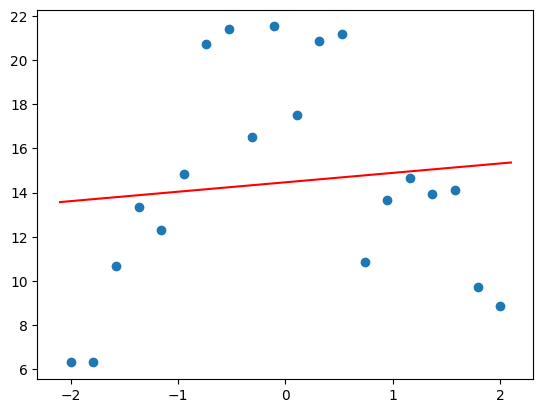

过拟合，简单说是“训练集表现好，没见过的数据表现不好”，模型在训练数据上的性能好，但在测试数据上的性能差。
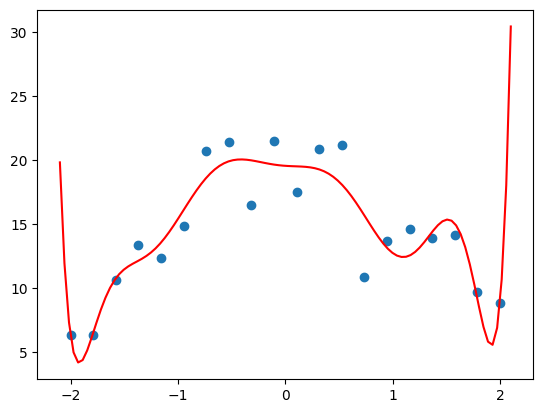

理想状态要在三类数据上都表现良好

发现过拟合的方法：
1. 训练集上的性能好，测试集上的性能差，验证验证集上的性能差。
2. 训练集上的损失函数和测试集上的损失函数有显著差异。

[How (and why) to create a good validation set](https://www.fast.ai/posts/2017-11-13-validation-sets.html)

## 关于避免过拟合的理论思考

为了避免过拟合，理想状态下，要让模型记住训练集的规律，但不泄露未来数据的信息。
- 训练集、验证集、测试集数据，在自变量分布上应该是相似的，并且要充分覆盖不同场景
- 训练集、验证集、测试集数据，在因变量生成机制上应该一致，但样本独立（切分规则不能依赖因变量）
举例来说：
- 任务：预测一个用户在未来30天是否会流失
- 自变量：
    - 最近30天用户活跃次数
    - 登录间隔
    - 功能使用频率
    - 每次使用时长
    - 消费金额
    - 用户等级
- 因变量：
    - y = 1：未来30天不再活跃
    - y = 0：未来30天活跃
- 理想状态下的数据构造：要从过去的自变量->因变量关系中学习因果关系，进而根据未来的自变量预测因变量
    - 选择24个月的数据，用前18个月作为训练集
    - 用19-21这三个月的数据作为验证集
    - 用22-24这三个月的数据作为测试集
- 反面的例子是对数据做随机打散，训练集会使用到未来的数据，导致过拟合。

# 关于模型的度量

[The problem with metircs is big problem for AI](http://fast.ai/2019/09/24/metrics)

当一个指标成为目标时，它就不再是一个好的指标了：
- 任何指标都只是你真正关心的事情的替代指标
- 指标可以而且会被操纵
- 指标往往过分强调短期影响
- 许多在线指标都在极易上瘾的环境中收集
- 只有将指标视为更大愿景中的一部分，它们才能发挥最大的作用

一般采用pearson系数来评估模型的性能。值越小，说明预测结果和实际结果越接近，模型的性能越好。



# NLP工作的具体步骤

0. 准备工作：
    1. 选择一个模型：选择一个Transformer架构的模型，如BERT、RoBERTa等。前期尽量选择小模型，因为小模型更快，可以做更多数据选择、做更多训练迭代。
1. Tokenization：
    1. 分词：将文本拆分为token，每个token对应一个词或一个字符。
    2. 数字化：将token转换为对应的数字表示。
    3. Dataset：将数字化的token转换为Dataset，方便后续的训练。Dataset中必须包含token和对应的标签。
2. 测试集：将测试集的token转换为Dataset，方便后续的测试。Dataset中必须包含token和对应的标签。


